# CVPR Project 1: Image Filtering and Hybrid Images

All projects in this course will be done with these iPython notebooks. These are convenient ways for you to quickly and easily interact with the code. A notebook contains many blocks of code, each of which can be run independently. You can run a cell with ctrl+enter or shift+enter (to move to the next cell).

If there are any notes you wish to leave for me as I test your code, you may leave them here.

A few numpy methods you should be familiar with are:

np.multiply,
np.sum,
numpy.dstack,
numpy.pad (for this project, you should use 'reflect'),
along with many others. You may not need to use all of these methods. 


## Setup

float32


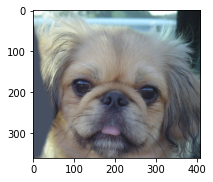

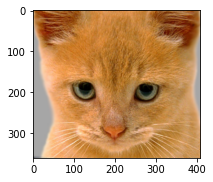

In [2]:
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from utils import vis_hybrid_image, load_image, save_image
from student_code import my_imfilter, create_hybrid_image
%load_ext autoreload
%autoreload 2


# load_image loads image as an RGB image.
# The resultant array data-type is 'floting point' numpy array
# elements r
image1 = load_image('../data/dog.bmp')
image2 = load_image('../data/cat.bmp')

print(image1.dtype)

# display the dog and cat images
plt.figure(figsize=(3,3)); plt.imshow((image1*255).astype(np.uint8));
plt.figure(figsize=(3,3)); plt.imshow((image2*255).astype(np.uint8));

## Create filter

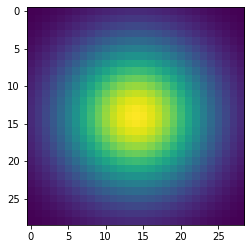

In [3]:
cutoff_frequency = 7
filter = cv2.getGaussianKernel(ksize=cutoff_frequency*4+1,
                               sigma=cutoff_frequency)
filter = np.dot(filter, filter.T)

# let's take a look at the filter!
plt.figure(figsize=(4,4)); plt.imshow(filter);

## Apply filter to image
Both functions you need to implement in this project can be found in _student_\__code.py_. Start by implementing _my_\__imfilter_, which takes both a filter and an image, and returns the filtered image. This code block will use your _my_\__imfilter_ function to create and display a blurry version of the dog image.

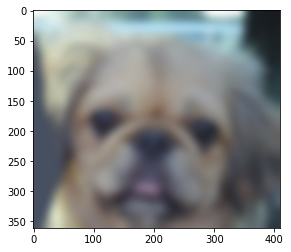

In [4]:
blurry_dog = my_imfilter(image1, filter)
plt.figure(); plt.imshow((blurry_dog*255).astype(np.uint8));

## Create hybrid image
Next, implement _create_\__hybrid_\__image_, which takes two images and makes a hybrid image using the low frequency content from one image and the high frequency content from another.

In [5]:
low_frequencies, high_frequencies, hybrid_image = create_hybrid_image(image1, image2, filter)
vis = vis_hybrid_image(hybrid_image)
vis=np.clip(vis*2,0,1)

## Show results

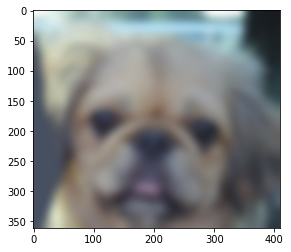

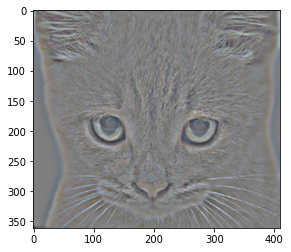

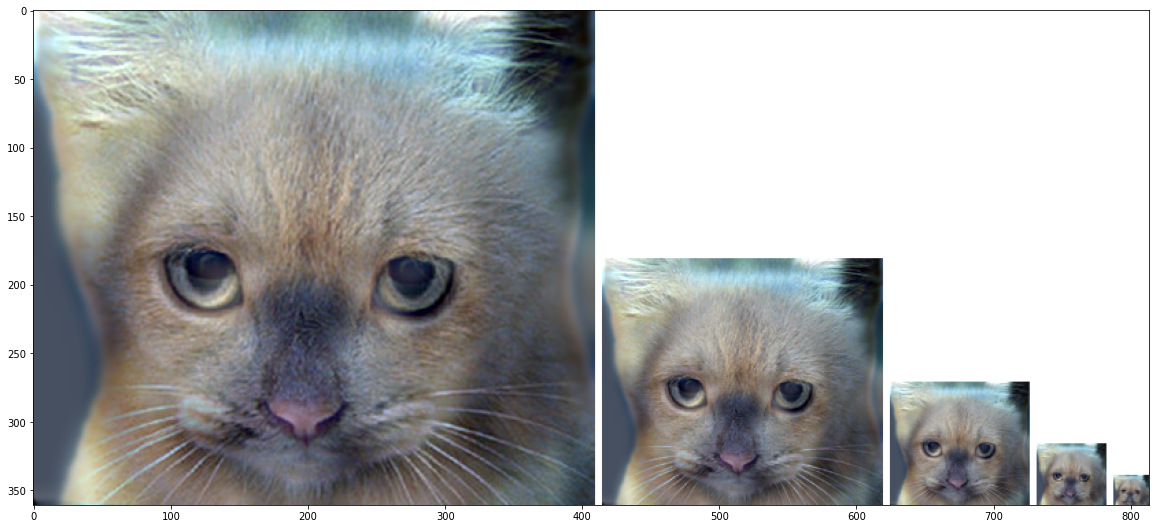

In [6]:
plt.figure(); plt.imshow((low_frequencies*255).astype(np.uint8));
plt.figure(); plt.imshow(((high_frequencies+0.5)*255).astype(np.uint8));
plt.figure(figsize=(20, 20)); plt.imshow(vis);

## Save results

In [6]:
save_image('../results/low_frequencies.jpg', low_frequencies)
save_image('../results/high_frequencies.jpg', high_frequencies+0.5)
save_image('../results/hybrid_image.jpg', hybrid_image)
save_image('../results/hybrid_image_scales.jpg', vis)

True

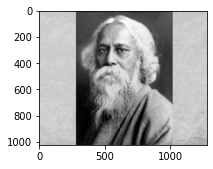

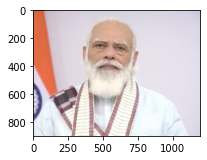

In [13]:
rabindranath = load_image('../data/rabindranath.jpg')
modi_first = load_image('../data/modi.jpg')

plt.figure(figsize=(3,3)); plt.imshow((rabindranath*255).astype(np.uint8));
plt.figure(figsize=(3,3)); plt.imshow((modi_first*255).astype(np.uint8));

In [14]:
dim=rabindranath.shape[1],rabindranath.shape[0]
modi1=cv2.resize(modi_first[:,:,0],dim, interpolation = cv2.INTER_AREA)
modi2=cv2.resize(modi_first[:,:,1],dim, interpolation = cv2.INTER_AREA)
modi3=cv2.resize(modi_first[:,:,2],dim, interpolation = cv2.INTER_AREA)
modi=np.zeros((rabindranath.shape[0],rabindranath.shape[1],rabindranath.shape[2]))
modi[:,:,0]=modi1
modi[:,:,1]=modi2
modi[:,:,2]=modi3

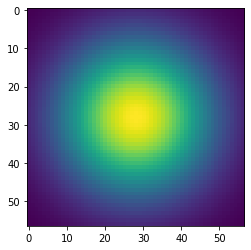

In [15]:
cutoff_frequency = 14
filter = cv2.getGaussianKernel(ksize=cutoff_frequency*4+1,
                               sigma=cutoff_frequency)
filter = np.dot(filter, filter.T)

# let's take a look at the filter!
plt.figure(figsize=(4,4)); plt.imshow(filter);

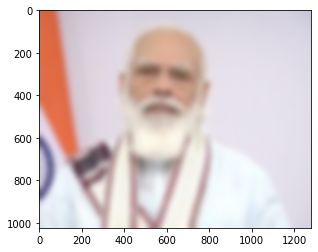

In [16]:
blurry_modi= my_imfilter(modi, filter)
plt.figure(); plt.imshow((blurry_modi*255).astype(np.uint8));

In [17]:
low_frequencies2, high_frequencies2, hybrid_image2 = create_hybrid_image(modi,rabindranath, filter)
vis2 = vis_hybrid_image(hybrid_image2)
vis2=np.clip(vis2*2,0,1)

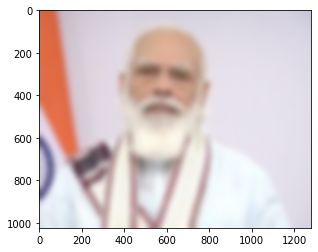

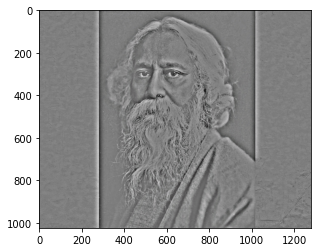

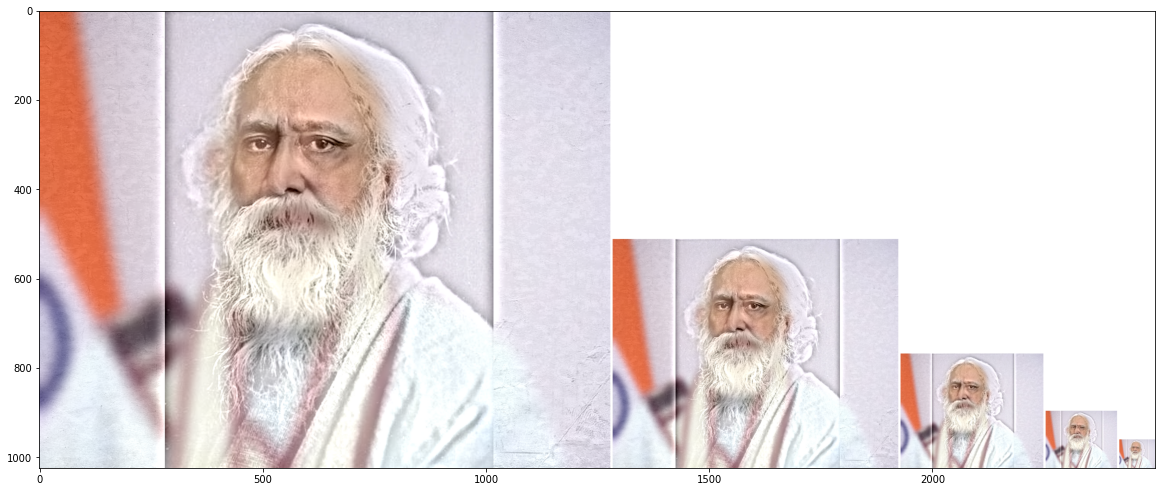

In [18]:
plt.figure(); plt.imshow((low_frequencies2*255).astype(np.uint8));
plt.figure(); plt.imshow(((high_frequencies2+0.5)*255).astype(np.uint8));
plt.figure(figsize=(20, 20)); plt.imshow(vis2);

In [19]:
save_image('../results/low_frequencies_modi.jpg', low_frequencies2)
save_image('../results/high_frequencies_rabindranath.jpg', high_frequencies2+0.5)
save_image('../results/hybrid_image_modi_rabindranath.jpg', hybrid_image2)
save_image('../results/hybrid_image_scales_modi_rabindranath.jpg', vis2)

True

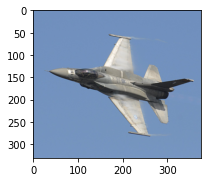

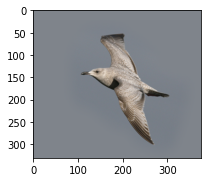

In [7]:
plane = load_image('../data/plane.bmp')
bird = load_image('../data/bird.bmp')

plt.figure(figsize=(3,3)); plt.imshow((plane*255).astype(np.uint8));
plt.figure(figsize=(3,3)); plt.imshow((bird*255).astype(np.uint8));

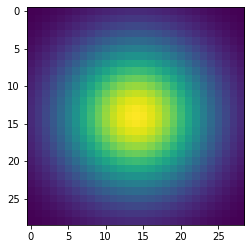

In [8]:
cutoff_frequency = 7
filter = cv2.getGaussianKernel(ksize=cutoff_frequency*4+1,
                               sigma=cutoff_frequency)
filter = np.dot(filter, filter.T)

plt.figure(figsize=(4,4)); plt.imshow(filter);

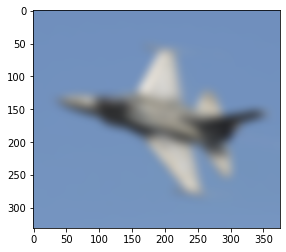

In [9]:
blurry_plane = my_imfilter(plane, filter)
plt.figure(); plt.imshow((blurry_plane*255).astype(np.uint8));

In [10]:
low_frequencies3, high_frequencies3, hybrid_image3 = create_hybrid_image(plane, bird, filter)
vis3 = vis_hybrid_image(hybrid_image3)
vis3=np.clip(vis3*2,0,1)

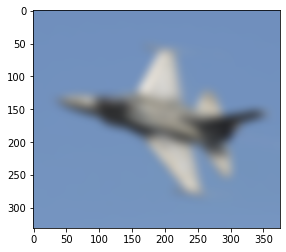

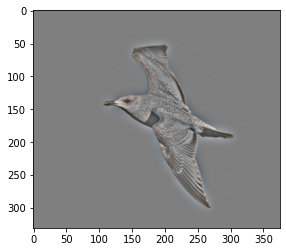

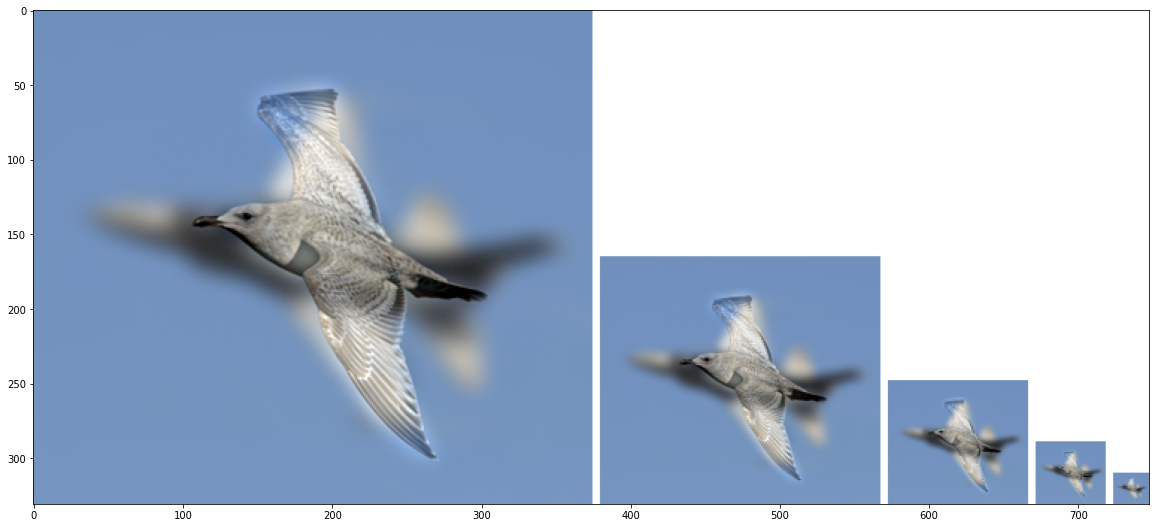

In [11]:
plt.figure(); plt.imshow((low_frequencies3*255).astype(np.uint8));
plt.figure(); plt.imshow(((high_frequencies3+0.5)*255).astype(np.uint8));
plt.figure(figsize=(20, 20)); plt.imshow(vis3);

In [12]:
save_image('../results/low_frequencies_plane.jpg', low_frequencies3)
save_image('../results/high_frequencies_bird.jpg', high_frequencies3+0.5)
save_image('../results/hybrid_image_plane_bird.jpg', hybrid_image3)
save_image('../results/hybrid_image_scales_plane_bird.jpg', vis3)

True

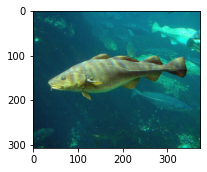

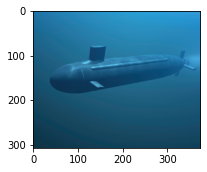

In [13]:
fish = load_image('../data/fish.bmp')
submarine = load_image('../data/submarine.bmp')

plt.figure(figsize=(3,3)); plt.imshow((fish*255).astype(np.uint8));
plt.figure(figsize=(3,3)); plt.imshow((submarine*255).astype(np.uint8));

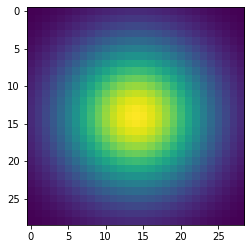

In [18]:
cutoff_frequency = 7
filter = cv2.getGaussianKernel(ksize=cutoff_frequency*4+1,
                               sigma=cutoff_frequency)
filter = np.dot(filter, filter.T)

plt.figure(figsize=(4,4)); plt.imshow(filter);

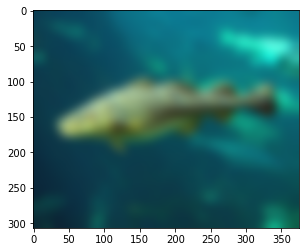

In [19]:
blurry_fish = my_imfilter(fish, filter)
plt.figure(); plt.imshow((blurry_fish*255).astype(np.uint8));

In [20]:
low_frequencies4, high_frequencies4, hybrid_image4 = create_hybrid_image(fish,submarine, filter)
vis4 = vis_hybrid_image(hybrid_image4)
vis4=np.clip(vis4*2,0,1)

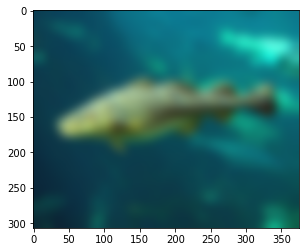

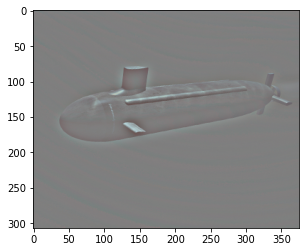

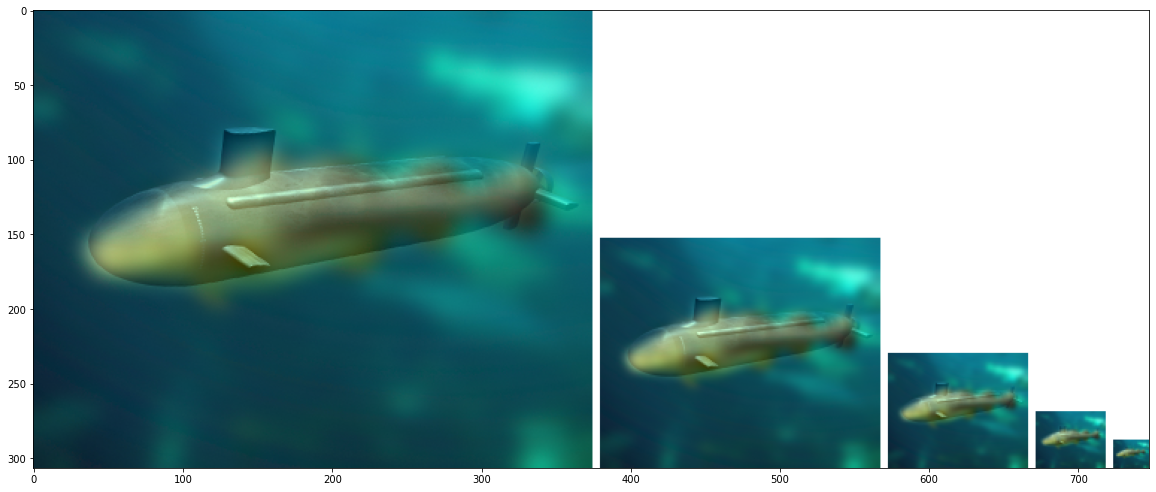

In [21]:
plt.figure(); plt.imshow((low_frequencies4*255).astype(np.uint8));
plt.figure(); plt.imshow(((high_frequencies4+0.5)*255).astype(np.uint8));
plt.figure(figsize=(20, 20)); plt.imshow(vis4);

In [22]:
save_image('../results/low_frequencies_fish.jpg', low_frequencies4)
save_image('../results/high_frequencies_submarine.jpg', high_frequencies4+0.5)
save_image('../results/hybrid_image_fish_submarine.jpg', hybrid_image4)
save_image('../results/hybrid_image_scales_fish_submarine.jpg', vis4)

True